# Time Series Clustering Example

## Import Modules

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans

## Load Data

In [61]:
df = pd.read_csv('ts_example.csv', index_col=0)
df.head()

,t0,t1,t2,t3,t4,t5,t6
idx,,,,,,,
0,12,27,30,48,59,60,76
1,11,30,31,44,58,66,70
2,16,25,36,50,59,68,76
3,19,26,38,47,56,64,73
4,18,22,30,43,58,61,72


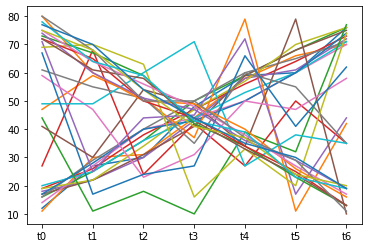

In [62]:
plt.plot(df.T)
plt.show()

눈으로는 증가하는 라인, 감소하는 라인, 불규칙 라인으로 구별이 된다.

## Preprocessing

일단, 값들을 정규화 해주어야 한다.

알고 있겠지만 정규화를 해주지 않으면 이상한 결과가 나온다.

In [63]:
avg_list = []
std_list = []

for idx, row in df.iterrows():
    avg_list.append(row.mean())
    std_list.append(row.std())

In [64]:
df['avg'] = avg_list
df['std'] = std_list
df.head()

,t0,t1,t2,t3,t4,t5,t6,avg,std
idx,,,,,,,,,
0,12,27,30,48,59,60,76,44.571429,22.463727
1,11,30,31,44,58,66,70,44.285714,21.638810
2,16,25,36,50,59,68,76,47.142857,22.363874
3,19,26,38,47,56,64,73,46.142857,19.777332
4,18,22,30,43,58,61,72,43.428571,20.911378


In [65]:
for i in range(len(df)):
    for j in range(0, 7):
        df.iloc[i, j] = (df.iloc[i, j] - df.iloc[i, 7]) / df.iloc[i, 8]
df.head()

,t0,t1,t2,t3,t4,t5,t6,avg,std
idx,,,,,,,,,
0,-1.449957,-0.782213,-0.648665,0.152627,0.642305,0.686822,1.399081,44.571429,22.463727
1,-1.538241,-0.660189,-0.613976,-0.013204,0.633782,1.003488,1.188341,44.285714,21.638810
2,-1.392552,-0.990117,-0.498253,0.127757,0.530192,0.932627,1.290346,47.142857,22.363874
3,-1.372423,-1.018482,-0.411727,0.043340,0.498406,0.902910,1.357976,46.142857,19.777332
4,-1.216016,-1.024733,-0.642166,-0.020495,0.696818,0.840281,1.366310,43.428571,20.911378


In [66]:
df = df.drop(['avg', 'std'], axis=1)
df.head()

,t0,t1,t2,t3,t4,t5,t6
idx,,,,,,,
0,-1.449957,-0.782213,-0.648665,0.152627,0.642305,0.686822,1.399081
1,-1.538241,-0.660189,-0.613976,-0.013204,0.633782,1.003488,1.188341
2,-1.392552,-0.990117,-0.498253,0.127757,0.530192,0.932627,1.290346
3,-1.372423,-1.018482,-0.411727,0.043340,0.498406,0.902910,1.357976
4,-1.216016,-1.024733,-0.642166,-0.020495,0.696818,0.840281,1.366310


## Model1: Euclidean

In [67]:
model = TimeSeriesKMeans(n_clusters=3, metric='euclidean', random_state=121)

In [68]:
result = model.fit_predict(df)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [69]:
df['clst'] = result
df.head()

,t0,t1,t2,t3,t4,t5,t6,clst
idx,,,,,,,,
0,-1.449957,-0.782213,-0.648665,0.152627,0.642305,0.686822,1.399081,0
1,-1.538241,-0.660189,-0.613976,-0.013204,0.633782,1.003488,1.188341,0
2,-1.392552,-0.990117,-0.498253,0.127757,0.530192,0.932627,1.290346,0
3,-1.372423,-1.018482,-0.411727,0.043340,0.498406,0.902910,1.357976,0
4,-1.216016,-1.024733,-0.642166,-0.020495,0.696818,0.840281,1.366310,0


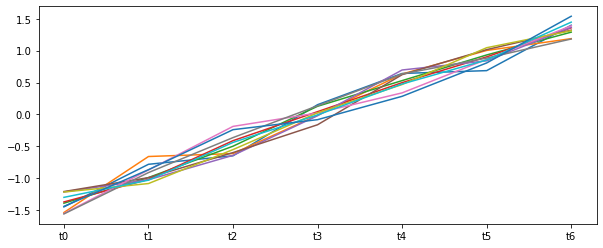

In [70]:
clst0 = df[df['clst']==0]
clst0.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst0.T)
plt.show()

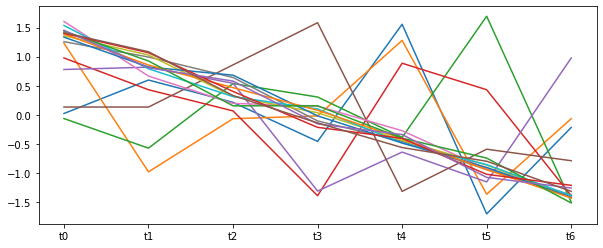

In [71]:
clst1 = df[df['clst']==1]
clst1.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst1.T)
plt.show()

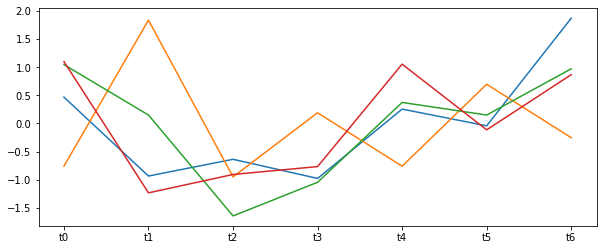

In [72]:
clst2 = df[df['clst']==2]
clst2.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst2.T)
plt.show()

## Model2: DTW

In [73]:
model2 = TimeSeriesKMeans(n_clusters=3, metric='dtw', random_state=121)

In [74]:
result2 = model2.fit_predict(df)
result2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [75]:
df['clst'] = result2
df.head()

,t0,t1,t2,t3,t4,t5,t6,clst
idx,,,,,,,,
0,-1.449957,-0.782213,-0.648665,0.152627,0.642305,0.686822,1.399081,0
1,-1.538241,-0.660189,-0.613976,-0.013204,0.633782,1.003488,1.188341,0
2,-1.392552,-0.990117,-0.498253,0.127757,0.530192,0.932627,1.290346,0
3,-1.372423,-1.018482,-0.411727,0.043340,0.498406,0.902910,1.357976,0
4,-1.216016,-1.024733,-0.642166,-0.020495,0.696818,0.840281,1.366310,0


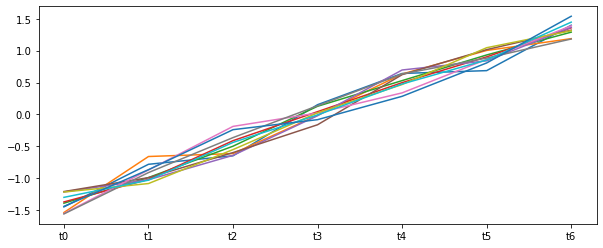

In [76]:
clst0 = df[df['clst']==0]
clst0.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst0.T)
plt.show()

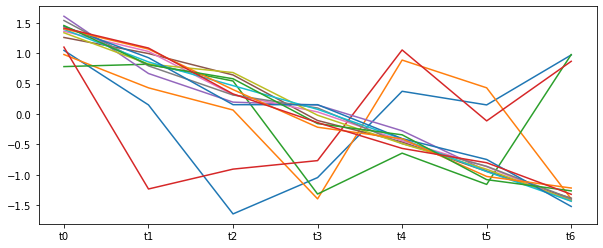

In [77]:
clst1 = df[df['clst']==1]
clst1.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst1.T)
plt.show()

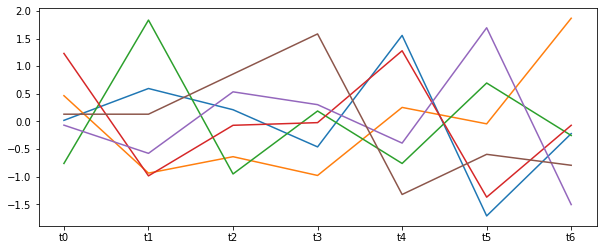

In [78]:
clst2 = df[df['clst']==2]
clst2.drop(['clst'], axis=1, inplace=True)
plt.figure(figsize=(10, 4))
plt.plot(clst2.T)
plt.show()

euclidean과 dtw를 이용한 Time Series Clustering의 간단한 예시를 보았다.

결과적으론, dtw를 이용한 것이 더 잘 분류함을 확인할 수 있었다.

물론 실제 시계열 데이터는 예시 데이터와는 다르게 매우 복잡하여, 이러한 방법이 잘 먹히지 않는다.